#TRATAMENTO DE DADOS

## IMPORTAÇÕES

In [1]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
#biblioteca para remover link
import re
from sklearn.utils import resample
#biblioteca para nuvem de palavras
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import altair as alt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#importando e salvando o dataset
dataset = pd.read_csv("data.csv")

In [3]:
#pegando as noticias e salvando em uma nova variavel
noticia = dataset.Sentence

In [4]:
#pegando os sentimentos e salvando em uma nova variavel
sentimento = dataset.Sentiment

In [6]:
#remoção de noticias paralelamente com o sentimento atrelado
boole = noticia.duplicated()

noticia_nao_repetida = []
sentimento_nao_repetido = []

for i in range(len(noticia)):
  if not boole[i]:
    noticia_nao_repetida.append(noticia[i])
    sentimento_nao_repetido.append(sentimento[i])

In [7]:
def remove_links(sentence):
    # Padrão de expressão regular para identificar links
    link_pattern = re.compile(r'https?://\S+|www\.\S+')

    # Substitui os links por uma string vazia
    sentence_without_links = re.sub(link_pattern, '', sentence)

    return sentence_without_links

# Exemplo de uso
noticia_sem_links = [remove_links(sentenca) for sentenca in noticia_nao_repetida]

In [8]:
#Análise de N-Gram

Stopwords = list(set(nltk.corpus.stopwords.words("english")) - set(["not"]))

df2 = pd.DataFrame({'Sentence':noticia_sem_links, 'Sentiment':sentimento_nao_repetido})

def Gram_Analysis(Corpus, Gram, N):

  # Vetorizador
  Vectorizer = CountVectorizer(stop_words = Stopwords, ngram_range=(Gram,Gram))

  # Matrix de N-Gran
  ngrams = Vectorizer.fit_transform(Corpus)

  # Frequencia de N-Gran
  Count = ngrams.sum(axis=0)

  # Lista de Palavras
  words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

  # Ordenar descendente com chave = contagem
  words = sorted(words, key = lambda x:x[1], reverse = True)

  return words[:N]

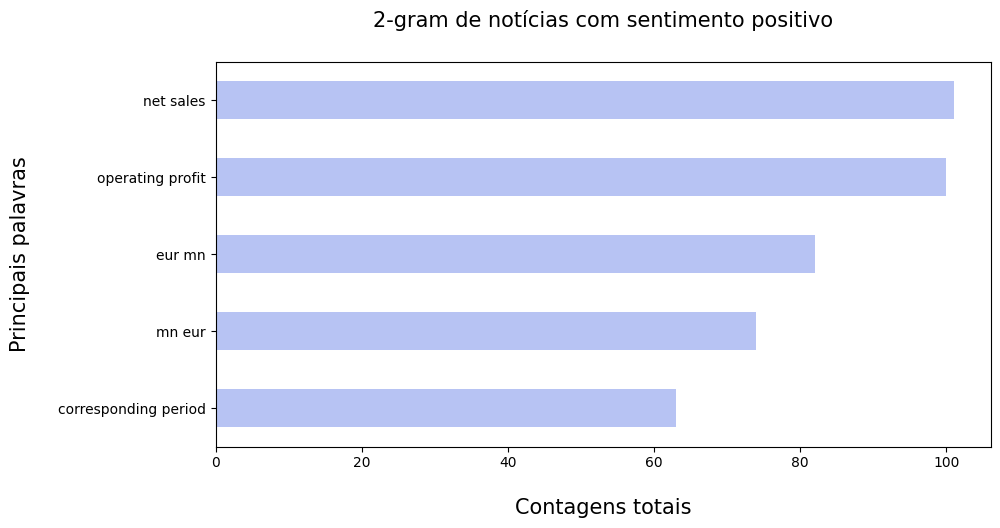

In [9]:
#Unigrams
# Encontrando 2-gram
df_positive = df2[df2["Sentiment"] == "positive"].dropna()
words_p = Gram_Analysis(df_positive["Sentence"], 2, 5)
Bigram = pd.DataFrame(words_p, columns = ["Words", "Counts"])

# Visualização
color_p=['#B7C3F3']
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = color_p, figsize = (10, 5))
plt.title("2-gram de notícias com sentimento positivo", loc = "center", fontsize = 15, pad = 25)
plt.xlabel("Contagens totais", fontsize = 15, labelpad = 20)
plt.xticks(rotation = 0)
plt.ylabel("Principais palavras", fontsize = 15, labelpad = 20)
plt.savefig('imagens/p_2gram.png', dpi=300)
plt.show()

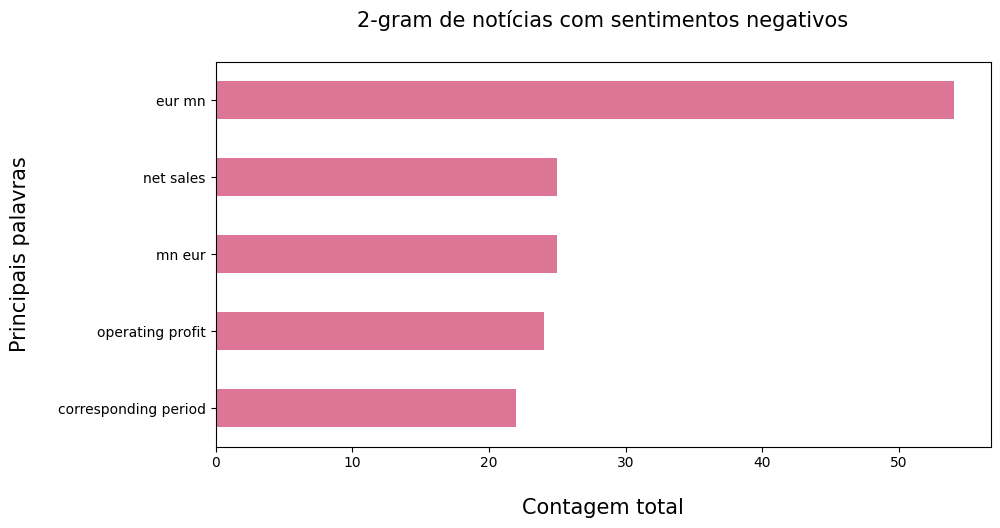

In [10]:
# Encontrando 2-gram
df_negative = df2[df2["Sentiment"] == "negative"].dropna()
words_n = Gram_Analysis(df_negative["Sentence"], 2, 5)
Bigram = pd.DataFrame(words_n, columns = ["Words", "Counts"])

# Visualização
color_n = ['#DD7596']
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = color_n, figsize = (10, 5))
plt.title("2-gram de notícias com sentimentos negativos", loc = "center", fontsize = 15, pad = 25)
plt.xlabel("Contagem total", fontsize = 15, labelpad = 20)
plt.xticks(rotation = 0)
plt.ylabel("Principais palavras", fontsize = 15, labelpad = 20)
plt.savefig('imagens/n_2gram.png', dpi=300)
plt.show()

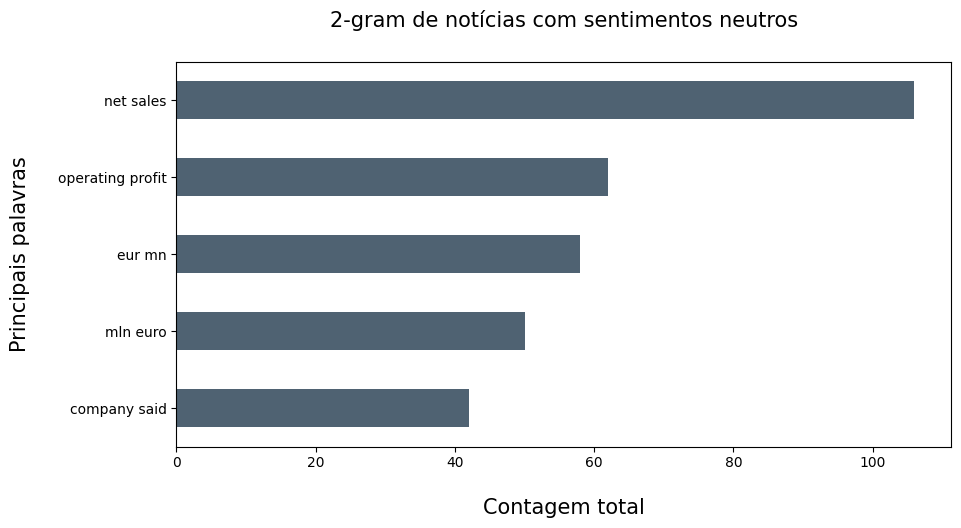

In [11]:
# Encontrando 2-gram
df_neutral = df2[df2["Sentiment"] == "neutral"].dropna()
words_nl = Gram_Analysis(df_neutral["Sentence"], 2, 5)
Bigram = pd.DataFrame(words_nl, columns = ["Words", "Counts"])

# Visualização
color_nl = ['#4F6272']
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = color_nl, figsize = (10, 5))
plt.title("2-gram de notícias com sentimentos neutros", loc = "center", fontsize = 15, pad = 25)
plt.xlabel("Contagem total", fontsize = 15, labelpad = 20)
plt.xticks(rotation = 0)
plt.ylabel("Principais palavras", fontsize = 15, labelpad = 20)
plt.savefig('imagens/nl_2gram.png', dpi=300)
plt.show()

In [12]:
#tokenização
noticia_tokens = [nltk.word_tokenize(noticia) for noticia in noticia_sem_links]

In [13]:
#normalização das noticia
#declarando a lista noticia_normalizado com seu tamanho para depois povoar com
#as palavras normalizadas
noticia_normalizado = [None]*len(noticia_tokens)
for i in range (len(noticia_tokens)):
  noticia_normalizado[i] = [word.lower() for word in noticia_tokens[i] if word.isalnum()]

In [14]:
#normalização dos sentimentos
sentimento_normalizado = [word.lower() for word in sentimento_nao_repetido if word.isalpha]

In [15]:
#remover as stop words
noticia_filtrado = [None]*len(noticia_normalizado)
stop_words = set(stopwords.words('english'))
for i in range (len(noticia_normalizado)):
  noticia_filtrado[i] = [token.lower() for token in noticia_normalizado[i] if not token in stop_words]

In [16]:
#lematização das noticias
lematizador = WordNetLemmatizer()
noticia_lematizado = [None]*len(noticia_filtrado)
for i in range (len(noticia_tokens)):
  noticia_lematizado[i] = [lematizador.lemmatize(token) for token in noticia_filtrado[i]]

In [17]:
novo_dataset = pd.DataFrame({'Sentence':noticia_lematizado, 'Sentiment':sentimento_normalizado})

In [18]:
#UNDERSAMPLING QUE DEU CERTOOOOOO
# Calcular a contagem de cada classe
counts = novo_dataset['Sentiment'].value_counts()

# Encontrar o sentimento com o menor número de instâncias
sentimento_minimo = counts.idxmin()

# Inicializar um DataFrame vazio para armazenar os subconjuntos balanceados
dfs_balanceados = []

# Iterar sobre cada classe
for sentimento in counts.index:
    # Dividir o DataFrame em subconjuntos por classe
    df_classe = novo_dataset[novo_dataset['Sentiment'] == sentimento]

    # Se não for a classe com o menor número de instâncias, realizar undersampling
    if sentimento != sentimento_minimo:
        df_classe_downsampled = resample(df_classe, replace=False, n_samples=counts[sentimento_minimo], random_state=42)
        dfs_balanceados.append(df_classe_downsampled)
    else:
        # Se for a classe com o menor número de instâncias, adicionar diretamente ao DataFrame balanceado
        dfs_balanceados.append(df_classe)

# Combinar os subconjuntos balanceados
df_balanceado = pd.concat(dfs_balanceados)

# Exibir o DataFrame balanceado
print(df_balanceado)

                                               Sentence Sentiment
866   [customer, include, company, energy, process, ...   neutral
2643     [investment, worth, approximately, eur, 100mn]   neutral
4371  [honkarakenne, also, decided, yesterday, sell,...   neutral
2920  [company, said, offshore, segment, represented...   neutral
2016  [vaisala, present, weather, detector, measure,...   neutral
...                                                 ...       ...
5296                    [fb, hitting, everything, twtr]  negative
5298                                  [bobe, premarket]  negative
5303                                   [acad, 2, today]  negative
5313         [sbux, pm, db, downgrade, pt, cut, 70, 64]  negative
5317  [hsbc, say, unit, book, 585, million, charge, ...  negative

[1776 rows x 2 columns]


In [19]:
df_balanceado['Sentiment'].value_counts()

neutral     592
positive    592
negative    592
Name: Sentiment, dtype: int64

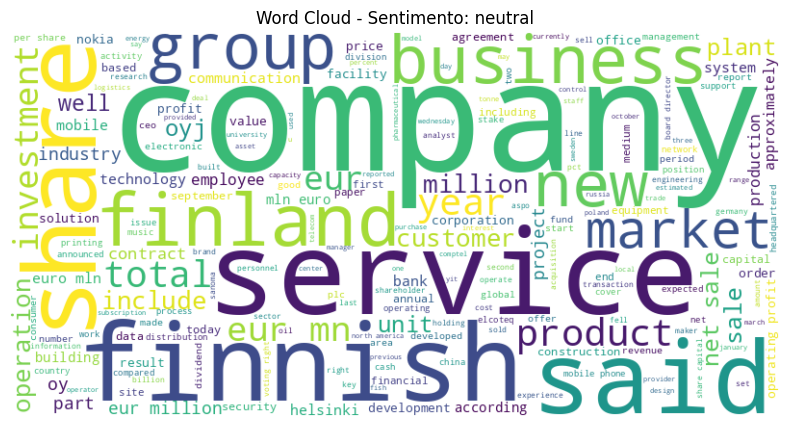

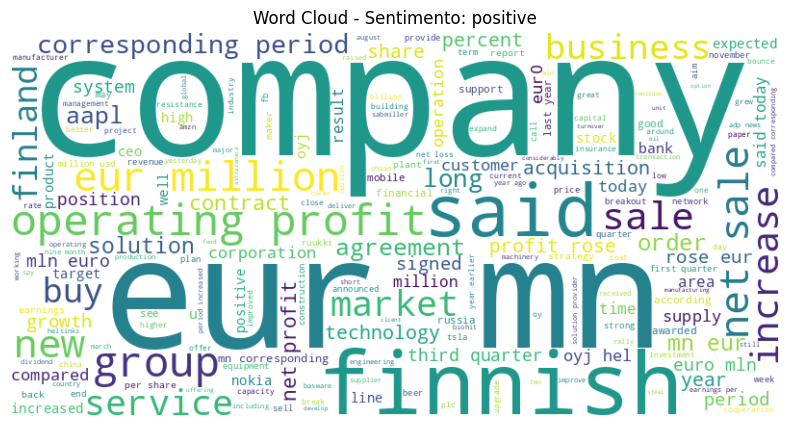

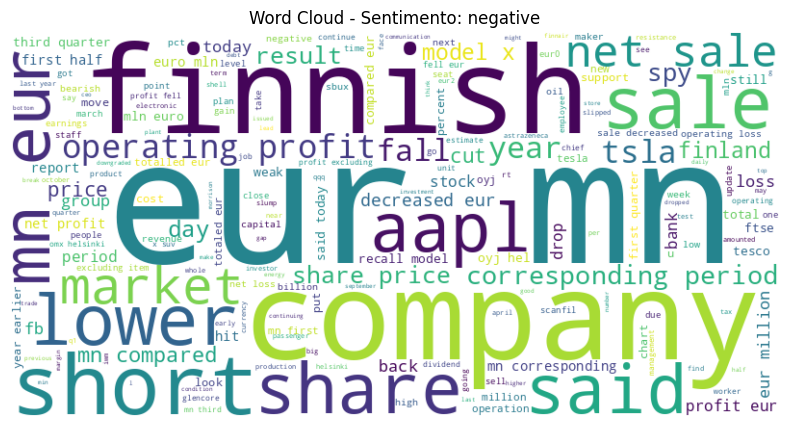

In [20]:
#nuvem de palavra
# Juntar todas as palavras tokenizadas em uma única string para cada sentimento
texto_sentimento = {}
for sentimento in df_balanceado['Sentiment'].unique():
    tokenizado_novo = df_balanceado[df_balanceado['Sentiment'] == sentimento]['Sentence'].values
    texto_sentimento[sentimento] = ' '.join([' '.join(tokens) for tokens in tokenizado_novo])

# Criar e exibir a nuvem de palavras para cada sentimento
for sentimento, texto in texto_sentimento.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - Sentimento: {sentimento}')
    plt.axis('off')
    plt.savefig(f'imagens/{sentimento}wordcloud.png', dpi=300)
    plt.show()

In [21]:
#adicionando ao dataset uma coluna titulo, com as tres primeiras palavras de cada noticia e uma coluna num_palavras com a quantidade de palavras
# Função para extrair os três primeiros tokens de uma lista de tokens
def extrair_tres_primeiros(tokens):
    return ' '.join(tokens[:3])
# Criar uma nova coluna chamada 'titulo' usando a função apply
df_balanceado['titulo'] = df_balanceado['Sentence'].apply(extrair_tres_primeiros)
# Adapte a função para contar o número de palavras em uma lista de tokens
def contar_palavras(tokens):
    return len(tokens)

# Criar uma nova coluna chamada 'num_palavras' usando a função apply
df_balanceado['num_palavras'] = df_balanceado['Sentence'].apply(contar_palavras)

df_balanceado

,Sentence,Sentiment,titulo,num_palavras
866,"[customer, include, company, energy, process, ...",neutral,customer include company,8
2643,"[investment, worth, approximately, eur, 100mn]",neutral,investment worth approximately,5
4371,"[honkarakenne, also, decided, yesterday, sell,...",neutral,honkarakenne also decided,12
2920,"[company, said, offshore, segment, represented...",neutral,company said offshore,24
2016,"[vaisala, present, weather, detector, measure,...",neutral,vaisala present weather,12
...,...,...,...,...
5296,"[fb, hitting, everything, twtr]",negative,fb hitting everything,4
5298,"[bobe, premarket]",negative,bobe premarket,2
5303,"[acad, 2, today]",negative,acad 2 today,3
5313,"[sbux, pm, db, downgrade, pt, cut, 70, 64]",negative,sbux pm db,8


In [48]:
#codigo do professor wellington adaptado para nosso dataset
pts = alt.selection(type="interval", encodings=["x"])

barras_de_linha = alt.Chart(df_balanceado).mark_bar().encode(
    x='num_palavras:Q',
    y=alt.Y('titulo:O', sort=alt.EncodingSortField(field="num_palavras", order='descending')),
    color='Sentiment:O',
    tooltip=['titulo', 'num_palavras', 'Sentence']
).transform_filter(
    pts
).properties(
    height=700,
    width=300,
    title='Quantidade de palavras por notícia'
)

hist = alt.Chart(df_balanceado).mark_bar().encode(
    x=alt.X('hbin:N', title='Quantidade de palavras'),
    y=alt.Y('count()', title='Contagem'),
    tooltip=[alt.Tooltip('count():Q', title='Contagem de notícias'),
             alt.Tooltip('mbin:N', title='Quantidade de palavras')],
    color=alt.condition(pts, alt.value("steelblue"), alt.value("lightgray"))
).properties(
    height=320,
    width=320,
    title='Histograma da quantidade de palavras por notícia'
).add_selection(pts)


hconcat = alt.hconcat(
    barras_de_linha,
    hist,
    data=df_balanceado
).transform_bin(
    "hbin",
    field="num_palavras",
    bin=alt.Bin(maxbins=50)
)

hconcat.save('1_tamanho_noticias.html')
hconcat


alt.HConcatChart(...)

In [29]:
# Amostragem de 5% dos dados
df_sample = df_balanceado.sample(frac=0.05, random_state=42)

pts = alt.selection(type="interval", encodings=["x"])

barras_de_linha = alt.Chart(df_sample).mark_bar().encode(
    x='num_palavras:Q',
    y=alt.Y('titulo:O', sort=alt.EncodingSortField(field="num_palavras", order='descending')),
    color='Sentiment:O',
    tooltip=['titulo', 'num_palavras', 'Sentence']
).transform_filter(
    pts
).properties(
    height=700,
    width=300,
    title='Quantidade de palavras por notícia (amostra)'
)

hist = alt.Chart(df_sample).mark_bar().encode(
    x=alt.X('hbin:N', title='Quantidade de palavras'),
    y=alt.Y('count()', title='Contagem'),
    tooltip=[alt.Tooltip('count():Q', title='Contagem de notícias'),
             alt.Tooltip('mbin:N', title='Quantidade de palavras')],
    color=alt.condition(pts, alt.value("steelblue"), alt.value("lightgray"))
).properties(
    height=320,
    width=320,
    title='Histograma da quantidade de palavras por notícia (amostra)'
).add_selection(pts)

hconcat = alt.hconcat(
    barras_de_linha,
    hist,
    data=df_sample
).transform_bin(
    "hbin",
    field="num_palavras",
    bin=alt.Bin(maxbins=50)
)

hconcat.save('1_tamanho_noticias_amostra.html')
hconcat

alt.HConcatChart(...)

In [78]:
noticias = df_balanceado['Sentence']

noticias_texto = noticias.apply(lambda tokens: ' '.join(tokens))

# Utiliza CountVectorizer para criar a matriz de termos
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(noticias_texto)

# Cria um DataFrame com a distribuição de frequência
freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Adiciona a coluna 'titulo' ao novo DataFrame
freq_df['titulo'] = df_balanceado['titulo']

# Cria um DataFrame para a distribuição de frequência final
final_freq_df = pd.DataFrame()

# Itera sobre as colunas de termos no DataFrame de frequência
for termo in freq_df.columns:
    if termo != 'titulo':  # Ignora a coluna 'titulo'
        # Obtém a soma da frequência do termo em todas as notícias
        freq_total = freq_df[termo].sum()

        # Filtra as notícias onde o termo aparece
        noticias_com_termo = df_balanceado[df_balanceado.apply(lambda row: termo in row['Sentence'], axis=1)]['Sentence'].tolist()

        # Cria uma nova linha para o DataFrame final
        nova_linha = pd.DataFrame({'termo': [termo], 'frequencia': [freq_total], 'noticias': [noticias_com_termo]})

        # Adiciona a nova linha ao DataFrame final
        final_freq_df = pd.concat([final_freq_df, nova_linha], ignore_index=True)

# Salva o novo DataFrame
final_freq_df.to_csv('distribuicao_frequencia_final.csv', index=False)

In [79]:
final_freq_df = final_freq_df.sort_values(by='frequencia',ascending=False)
final_freq_df.head()

,termo,frequencia,noticias
1608,eur,332,"[[investment, worth, approximately, eur, 100mn..."
1032,company,238,"[[customer, include, company, energy, process,..."
2947,mn,206,"[[company, withdrawing, second, part, eur, mn,..."
3510,profit,174,"[[third, quarter, fiscal, 2008, efore, swung, ..."
3892,sale,169,"[[group, net, sale, eur, 235, million, 2009, e..."


In [80]:
df_freq50 = final_freq_df[0:50]

wordfreq = alt.Chart(df_freq50).mark_bar().encode(
    y='frequencia:Q',
    x= alt.X('termo:O', sort = alt.EncodingSortField(field="frequencia", order='descending')),
    color = alt.value('steelblue'),
    tooltip=[
        'termo:O',
        'frequencia:Q',
        alt.Tooltip('noticias:O', title='Noticias onde o termo ocorre')
    ]
).properties(
    height=300,
    width = 850,
    title = '50 termos mais frequentes'
)

wordfreq.save('2_frequencia_termos.html')
wordfreq

alt.Chart(...)